#Ejemplos

In [ ]:
def RungeKutta(f,x0,xf,y,h):
  n = int((xf-x0)/h)
  X = []
  Y = [] 
  for i in range(0,n+1):
    k1 = f(x0,y)
    k2 = f(x0 + h/2,y + (k1*h)/2)
    k3 = f(x0 + h/2,y + (k2*h)/2)
    k4 = f(x0 + h, y + (k3*h))
    y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    x0 += h
    X.append(x0)
    Y.append(y)
  return([X,Y]) 

In [ ]:
import math
import matplotlib.pyplot as plt



def f(x,y): 
  e = math.e
  return((y+1)*(x+1)*(math.cos(x**2 + 2*x)))   # dy/dx = f(x,y) # Valor incial: y(0)=4

def analitica(x):
  return(5*math.exp((1/2)*math.sin(x**2+2*x)) - 1) #Solución analítica

h = float(input("Tamaño del paso h: ")) # Introduzca un valor adecuado, por ejemplo 0.05, 0.1, 0.2, 0.25, 0.5
x0 = float(input("Valor inicial x: ")) # x = 0
xf = float(input("Valor final x: ")) # x = 2
y = float(input("Valor inicial y: ")) # y = 4

n = int((xf-x0)/h) #Número de iteraciones

X = []
Y = []
Z = []
print("\n\n\t\t\t\t\t\t Tabla")
print('{:^25}{:^25}{:^25}{:^25}'.format('x','y aproximado','y analitica','Error'))
for i in range(0,n+1):
  print('{:^25.4f}{:^25.8f}{:^25.8f}{:^25.8f}'.format(x0,y,analitica(x0),abs(y-analitica(x0)))) #Tabla
  k1 = f(x0,y)
  k2 = f(x0 + h/2,y + (k1*h)/2)
  k3 = f(x0 + h/2,y + (k2*h)/2)
  k4 = f(x0 + h, y + (k3*h))
  y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
  x0 += h
  X.append(x0)
  Y.append(y)
  Z.append(analitica(x0))

plt.plot(X,Y,"ro",X,Y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximación por Runge Kutta")
plt.show()

plt.plot(X,Z,"ro",X,Z)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solución analítica")
plt.show()

Tamaño del paso h: 1


#Modelado tipo SEIRD de Covid-19 

In [ ]:
N = float(9*1000000) #Población inicial
 
beta = float(0.166) #Tasa de contagio
rbeta = float(1/2) #Fracción de tasa de los contagios de los infectados asintomáticos (I_a)
miu = float(1/21) #Tasa de recuperación
Rep0 = float(beta/miu) #Número básico reproductivo de la epidemia
epsilon = float(1/5) #Tasa de encubación
pa = float(4/5) #Fracción de expuestos que pasan a infectados sintomaticos
pd = float(3/100) #Fracción de infectados sintomaticos que fallecen
 
 
 
S = float(N) #Población inicial
Is = float(140) #Caso inicial de infectado sintomático
Ia = float(10*(Is)) 
D = float(0) #Fallecidos
R = float(3.486) #Recuperados
E = (5368.44) #Expuestos
 
 
def St(S,E,Ia,Is):
  return(-((beta)*(rbeta)*S*((Ia)/N) + (beta)*(S)*((Is)/N)))
def Et(S,E,Ia,Is):
  return(beta*rbeta*S*(Ia/N) + beta*S*(Is/N) - epsilon*pa*E - epsilon*(1-pa)*E)
def Iat(S,E,Ia,Is):
  return(epsilon*pa*E - miu*Ia)
def Ist(S,E,Ia,Is):
  return(epsilon*(1-pa)*E  - miu*(1-pd)*Is - miu*pd*Is)
def Rt(S,E,Ia,Is):
  return(miu*(1-pd)*Is + miu*Ia)
def Dt(S,E,Ia,Is):
  return(miu*pd*Is)
def Nt(a1,a2,a3,a4,a5,a6):
  return(a1+a2+a3+a4+a5)
 
def Rungekutta(S,E,Ia,Is,R,D,N,t,h,lim):
  N1=N
  Suscep = []
  Expuest = []
  Infasin = []
  Infsin = []
  Recup =[]
  Muert = []
  Poblacion = []
  while t<lim:
    Suscep.append(S)
    Expuest.append(E)
    Infasin.append(Ia)
    Infsin.append(Is)
    Recup.append(R)
    Muert.append(D)
    Poblacion.append(N1)
    #Funciones 1
    s1 = St(S,E,Ia,Is)
    e1 = Et(S,E,Ia,Is)
    ia1 = Iat(S,E,Ia,Is)
    is1 = Ist(S,E,Ia,Is)
    r1 = Rt(S,E,Ia,Is)
    d1 = Dt(S,E,Ia,Is)
    #Funciones 2
    s2 = St(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    e2 = Et(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    ia2 = Iat(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    is2 = Ist(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    r2 = Rt(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    d2 = Dt(S + (h/2)*s1,E + (h/2)*e1 ,Ia + (h/2)*ia1 ,Is + (h/2)*is1)
    #Funciones 3
    s3 = St(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    e3 = Et(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    ia3 = Iat(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    is3 = Ist(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    r3 = Rt(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    d3 = Dt(S + (h/2)*s2,E + (h/2)*e2 ,Ia + (h/2)*ia2 ,Is + (h/2)*is2)
    #Funciones 4
    s4 = St(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    e4 = Et(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    ia4 = Iat(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    is4 = Ist(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    r4 = Rt(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    d4 = Dt(S + h*s3,E + h*e3 ,Ia + h*ia3 , Is + h*is3)
    #Incremento
    t += h
    #Iteración
    S = S + (h/6)*(s1 + 2*s2 + 2*s3 + s4)
    E = E + (h/6)*(e1 + 2*e2 + 2*e3 + e4)
    Ia = Ia + (h/6)*(ia1 + 2*ia2 + 2*ia3 + ia4)
    Is = Is + (h/6)*(is1 + 2*is2 + 2*is3 + is4)
    R = R + (h/6)*(r1 + 2*r2 + 2*r3 + r4)
    D = D + (h/6)*(d1 + 2*d2 + 2*d3 + d4)
    N1 = N-D
  return ([Suscep,Expuest,Infasin,Infsin,Recup,Muert,Poblacion])
 
h = int(input("Tamaño del paso (dt): "))
l = int(input("Dia final: ")) 
k = Rungekutta(S,E,Ia,Is,R,D,N,0,h,l+1)
 
print('{:^5}{:^25}{:^25}{:^25}{:^25}{:^25}{:^20}{:^20}'.format("Día","Susceptible(S)","Expuestos(E)","Asintomaticos(Ia)","Sintomaticos(Is)","Recuperados","Muertos","Vivos"))
for i in range(0,l+1):
  print('{:^5}{:^25.0f}{:^25.0f}{:^25.0f}{:^25.0f}{:^25.0f}{:^20.0f}{:^20.0f}'.format(i,k[0][i],k[1][i],k[2][i],k[3][i],k[4][i],k[5][i],k[6][i]))

Tamaño del paso (dt): 1
Dia final: 365
 Día      Susceptible(S)            Expuestos(E)           Asintomaticos(Ia)        Sintomaticos(Is)            Recuperados             Muertos              Vivos        
  0           9000000                   5368                     1400                      140                       3                     0                9000000       
  1           8999814                   4565                     2107                      327                      99                     0                9000000       
  2           8999548                   3980                     2674                      478                      232                    1                8999999       
  3           8999216                   3560                     3137                      602                      395                    2                8999998       
  4           8998830                   3265                     3522                      707            

Tamaño del paso (dt): 1
Dia final: 365


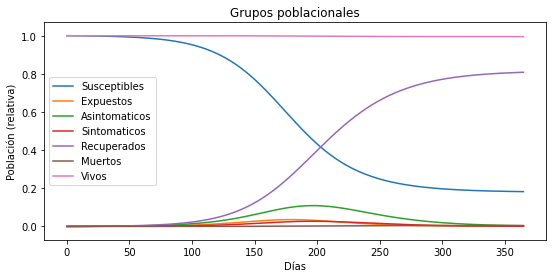

In [ ]:
import matplotlib.pyplot as plt

h = int(input("Tamaño del paso (dt): "))
l = int(input("Dia final: ")) 
k = Rungekutta(S,E,Ia,Is,R,D,N,0,h,l+1)
X = [x for x in range(0,l+1)]
Y1 = [(k[0][i])/N for i in X] #Susceptibles
Y2 = [(k[1][i])/N for i in X] #Expuestos
Y3 = [(k[2][i])/N for i in X] #Asintomaticos
Y4 = [(k[3][i])/N for i in X] #Sintomaticos
Y5 = [(k[4][i])/N for i in X] #Recuperados
Y6 = [(k[5][i])/N for i in X] #Muertos
Y7 = [(k[6][i])/N for i in X] #Vivos

plt.figure(figsize=(9, 4))
plt.title("Grupos poblacionales")
plt.plot(X,Y1,label="Susceptibles")
plt.plot(X,Y2,label="Expuestos")
plt.plot(X,Y3,label="Asintomaticos")
plt.plot(X,Y4,label="Sintomaticos")
plt.plot(X,Y5,label="Recuperados")
plt.plot(X,Y6,label="Muertos")
plt.plot(X,Y7,label="Vivos")
plt.xlabel("Días")
plt.ylabel("Población (relativa)")
plt.ylim(-0.07,1.07)
#plt.grid(True)
plt.legend()
plt.show()

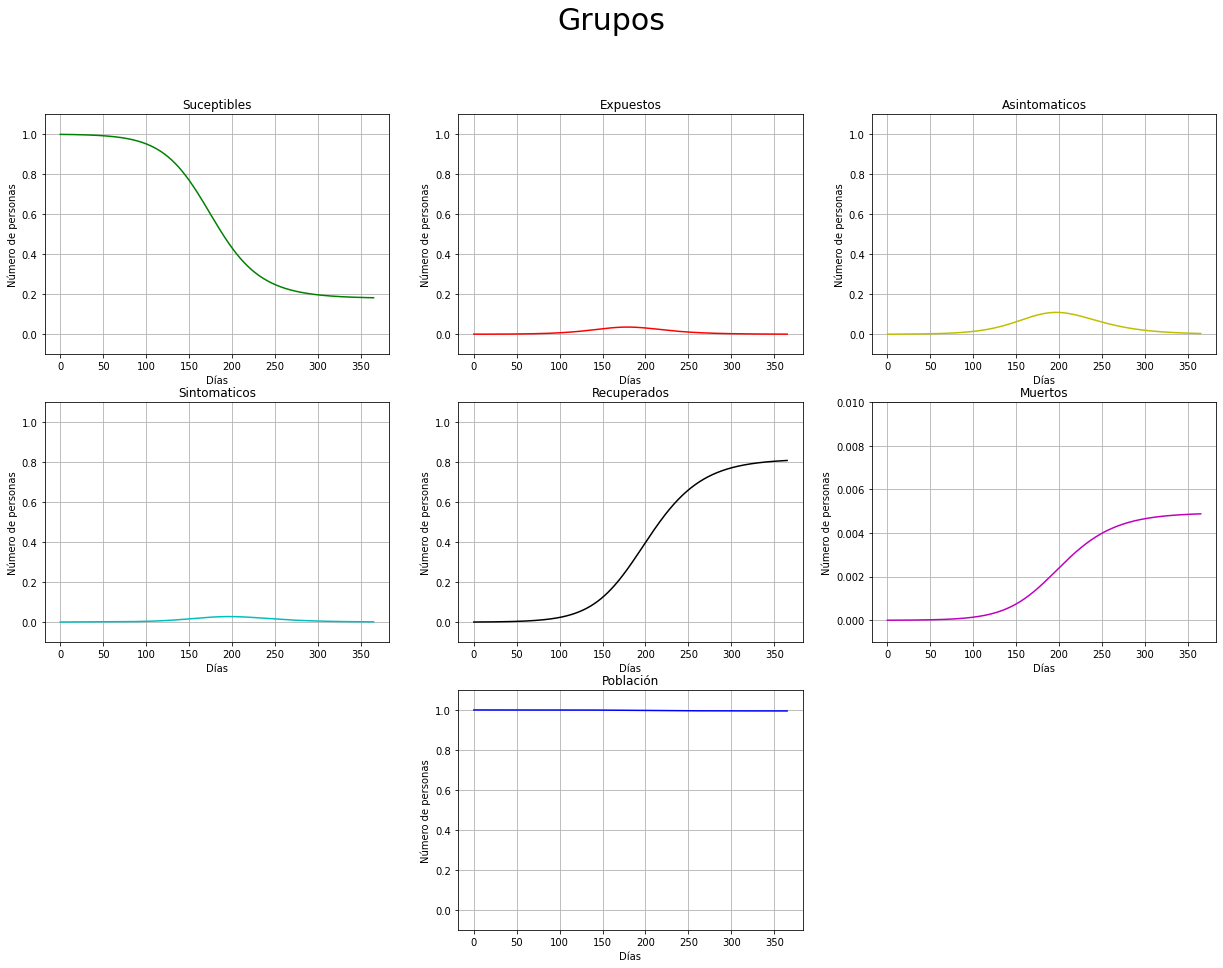

In [ ]:
import matplotlib.font_manager as font_manager
title_font = {'size':'30', 'color':'black', 'weight':'normal'} 

plt.figure(figsize=(21, 15))

plt.subplot(331)
plt.ylim(-0.1,1.1)
plt.plot(X, Y1,"g-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Suceptibles")
plt.grid(True)
plt.subplot(332)
plt.ylim(-0.1,1.1)
plt.plot(X, Y2,"r-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Expuestos")
plt.grid(True)
plt.subplot(333)
plt.ylim(-0.1,1.1)
plt.plot(X, Y3,"y-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Asintomaticos")
plt.grid(True)
plt.subplot(334)
plt.ylim(-0.1,1.1)
plt.plot(X, Y4,"c-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Sintomaticos")
plt.grid(True)
plt.subplot(335)
plt.ylim(-0.1,1.1)
plt.plot(X, Y5,"k-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Recuperados")
plt.grid(True)
plt.subplot(336)
plt.ylim(-0.001,0.01)
plt.plot(X, Y6,"m-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Muertos")
plt.grid(True)
plt.subplot(338)
plt.ylim(-0.1,1.1)
plt.plot(X, Y7,"b-")
plt.xlabel("Días")
plt.ylabel("Número de personas")
plt.title("Población")
plt.grid(True)
plt.suptitle('Grupos',**title_font)
plt.show()

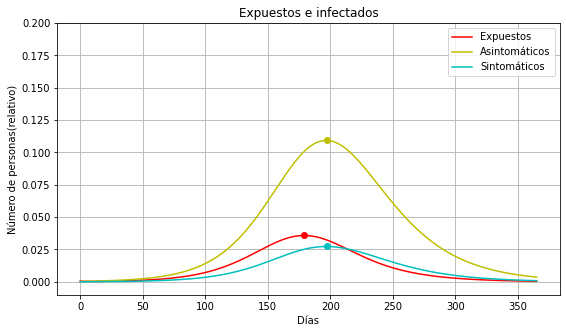

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(9, 5))
plt.ylim(-0.01,0.2)
plt.title("Expuestos e infectados")
plt.plot(X, Y2,"r-",label="Expuestos")
plt.plot(X, Y3,"y-",label="Asintomáticos")
plt.plot(X, Y4,"c-",label="Sintomáticos")
plt.plot(179,Y2[179],"ro")
plt.plot(197,Y3[197],"yo")
plt.plot(197,Y4[197],"co")
plt.xlabel("Días")
plt.ylabel("Número de personas(relativo)")
plt.legend()
plt.grid(True)
plt.show()

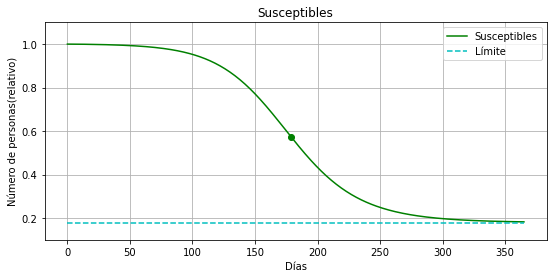

In [ ]:
import matplotlib.pyplot as plt

B = [(1615110)/N for x in X]

plt.figure(figsize=(9, 4))
plt.ylim(0.1,1.1)
plt.title("Susceptibles")
plt.plot(X, Y1,"g-",label="Susceptibles")
plt.plot(X,B,"c--",label="Límite")
plt.plot(179,Y1[179],"go")
plt.xlabel("Días")
plt.ylabel("Número de personas(relativo)")
plt.legend()
plt.grid(True)
plt.show()

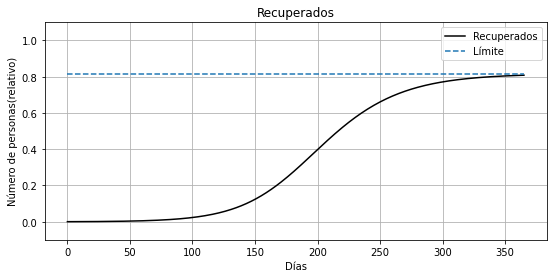

In [ ]:
import matplotlib.pyplot as plt

C = [(7347456)/N for x in X]

plt.figure(figsize=(9, 4))
plt.ylim(-0.1,1.1)
plt.title("Recuperados")
plt.plot(X, Y5,"k-",label="Recuperados")
plt.plot(X,C,"--",label="Límite")
plt.xlabel("Días")
plt.ylabel("Número de personas(relativo)")
plt.legend()
plt.grid(True)
plt.show()

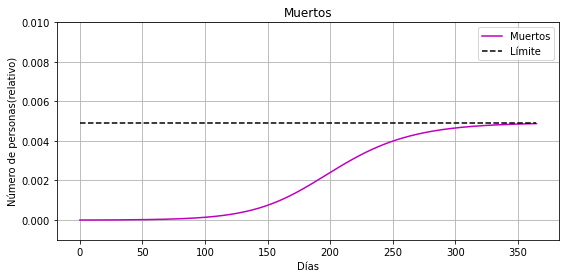

In [ ]:
import matplotlib.pyplot as plt
K = [(44346)/N for x in X]
plt.figure(figsize=(9, 4))
plt.ylim(-0.001,0.01)
plt.title("Muertos")
plt.plot(X, Y6,"m-",label="Muertos")
plt.plot(X,K,"k--",label="Límite")
plt.xlabel("Días")
plt.ylabel("Número de personas(relativo)")
plt.legend()
plt.grid(True)
plt.show()